In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mtd = 'at' # 'kd'
root_dir = 'log/ilsvrc2012/' #'log/ilsvrc2012/crd/run-2025-08-05'
archs = 'resnet18_from_resnet34'

train_suffix = '_train.csv'
val_suffix = '_val.csv'
test_suffix = '_test.csv'

In [3]:
train_file = os.path.join(root_dir, mtd, archs+train_suffix)
val_file = os.path.join(root_dir, mtd, archs+val_suffix)

train_cols = pd.read_csv(train_file)
val_cols = pd.read_csv(val_file)

val_cols

,Epoch,Acc@1,Acc@5
0,0,26.482,52.216
1,1,33.690,60.688
2,2,40.998,68.298
3,3,42.832,69.756
4,4,43.376,70.356
...,...,...,...
95,95,70.476,89.940
96,96,70.502,89.972
97,97,70.494,89.938
98,98,70.334,89.924


In [4]:
train_cols

,Epoch,sub_iter,num_iter_per_epoch,lr,img/s,batch_loss_med,epoch_loss_avg,time
0,0,0,5005,0.1000,105.933069,16.4509,16.4509,1.9764
1,0,1000,5005,0.1000,1733.648001,9.2060,10.6617,0.0740
2,0,2000,5005,0.1000,1736.799935,7.8292,9.5619,0.0742
3,0,3000,5005,0.1000,1752.178223,7.0275,8.8390,0.0742
4,0,4000,5005,0.1000,1737.024709,6.5468,8.3070,0.0773
...,...,...,...,...,...,...,...,...
595,99,1000,5005,0.0001,1748.127432,2.1042,2.1145,0.0742
596,99,2000,5005,0.0001,1741.272609,2.1282,2.1165,0.0741
597,99,3000,5005,0.0001,1737.789376,2.0844,2.1151,0.0754
598,99,4000,5005,0.0001,1728.468350,2.1105,2.1169,0.0742


In [5]:
train_cols.columns.tolist(), val_cols.columns.tolist()

(['Epoch',
  'sub_iter',
  'num_iter_per_epoch',
  'lr',
  'img/s',
  'batch_loss_med',
  'epoch_loss_avg',
  'time'],
 ['Epoch', 'Acc@1', 'Acc@5'])

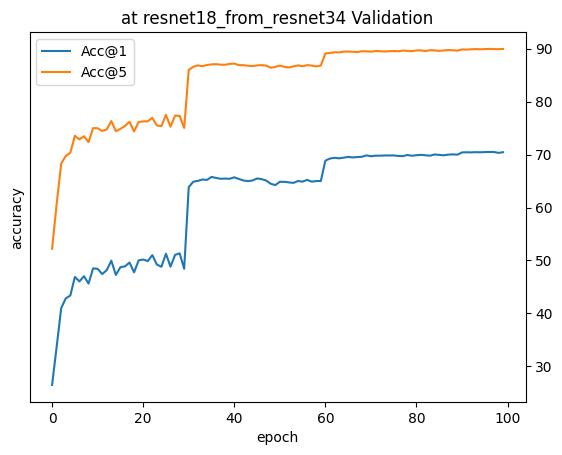

In [6]:
epoch_ax = val_cols['Epoch']

acc1_val = val_cols['Acc@1']
acc5_val = val_cols['Acc@5']

# Set default y-axis tick labels on the right
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = False  # Ensure left ticks are off if desired
plt.rcParams['ytick.labelleft'] = False

plt.plot(acc1_val, label='Acc@1')
plt.plot(acc5_val, label='Acc@5')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('{} {} Validation'.format(mtd, archs))
plt.legend()

In [7]:
plt.rcParams['ytick.right'] = False
plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.labelleft'] = True

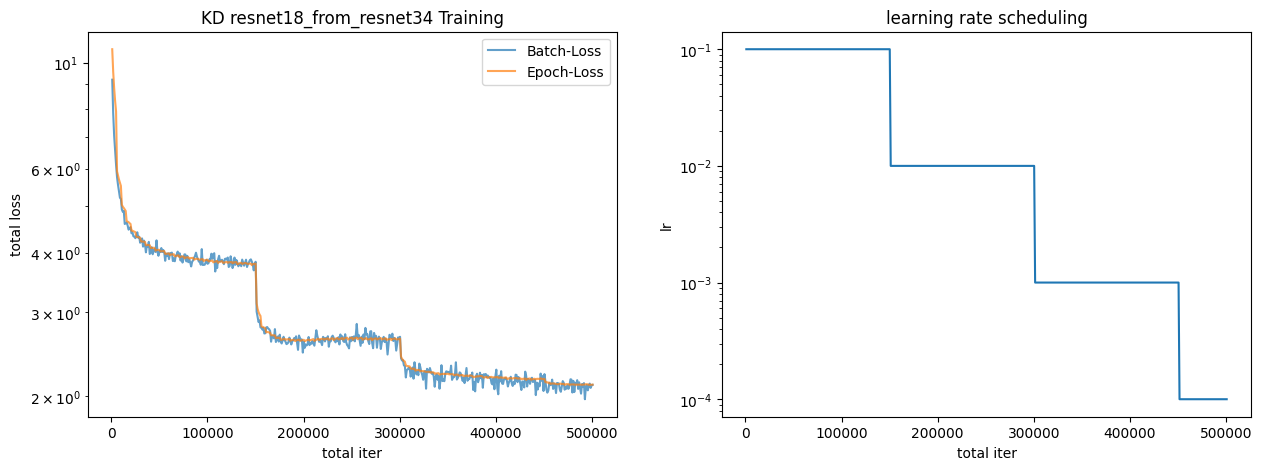

In [8]:
idx = train_cols['sub_iter'] > 0
iter_ax = (train_cols['Epoch'] * train_cols['num_iter_per_epoch'] + train_cols['sub_iter'])[idx]


iter_val = train_cols['batch_loss_med'][idx]
epoch_val = train_cols['epoch_loss_avg'][idx]
lr_val = train_cols['lr'][idx]

fig, (loss_plt, opt_plt) = plt.subplots(1, 2, figsize=(15, 5))

loss_plt.plot(iter_ax, iter_val, label='Batch-Loss', alpha=0.7)
loss_plt.plot(iter_ax, epoch_val, label='Epoch-Loss', alpha=0.7)

loss_plt.set_xlabel('total iter')
loss_plt.set_ylabel('total loss')
loss_plt.set_title('KD {} Training'.format(archs))
loss_plt.set_yscale('log')
loss_plt.legend()

opt_plt.plot(iter_ax, lr_val)

opt_plt.set_xlabel('total iter')
opt_plt.set_ylabel('lr')
opt_plt.set_title('learning rate scheduling'.format(archs))
opt_plt.set_yscale('log')

Text(0.5, 1.0, 'Iteration Speed')

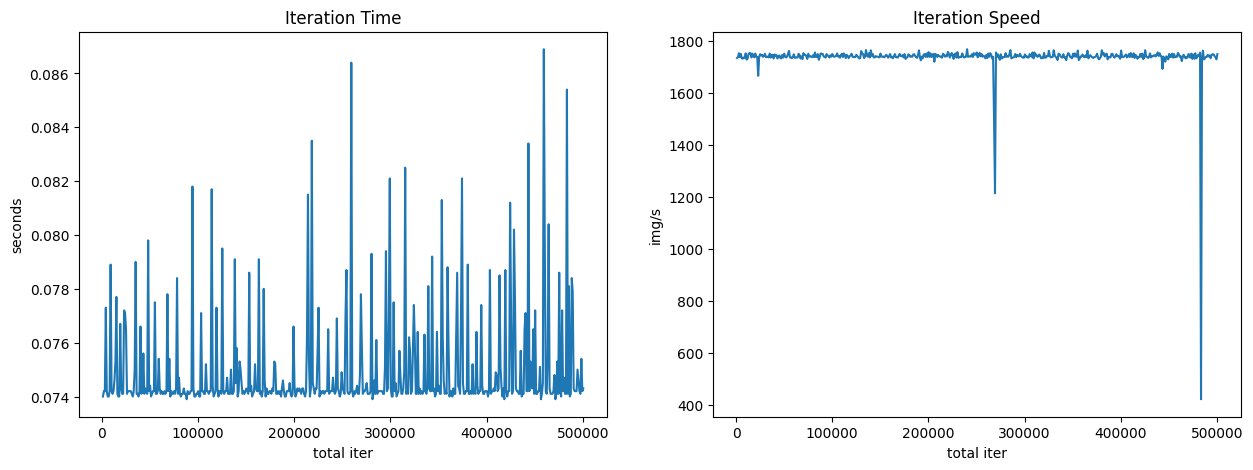

In [9]:
time_val = train_cols['time'][idx]
speed_val = train_cols['img/s'][idx]

fig, (time_plt, speed_plt) = plt.subplots(1, 2, figsize=(15, 5))

#idx = (np.arange(len(iter_ax)) % 5) != 0

time_plt.plot(iter_ax, time_val)  # Filter log at beginning of epoch due to significant overhead
speed_plt.plot(iter_ax, speed_val)

time_plt.set_xlabel('total iter')
time_plt.set_ylabel('seconds')
time_plt.set_title('Iteration Time')

speed_plt.set_xlabel('total iter')
speed_plt.set_ylabel('img/s')
speed_plt.set_title('Iteration Speed')

Compare accuracy to other runs

In [10]:
root_dir = 'log'
dataset = 'ilsvrc2012'
arch = 'resnet18_from_resnet34'
mtd_list = ['ce', 'kd', 'at', 'crd']
tag_list = ['', 'run-2025-08-05', '', 'run-2025-08-05']

run_list = [
    os.path.join(root_dir, dataset, mtd, tag, arch+val_suffix) for mtd, tag in zip(mtd_list, tag_list)
]
run_list

['log/ilsvrc2012/ce/resnet18_from_resnet34_val.csv',
 'log/ilsvrc2012/kd/run-2025-08-05/resnet18_from_resnet34_val.csv',
 'log/ilsvrc2012/at/resnet18_from_resnet34_val.csv',
 'log/ilsvrc2012/crd/run-2025-08-05/resnet18_from_resnet34_val.csv']

Text(0.5, 0.98, 'resnet18_from_resnet34, ilsvrc2012')

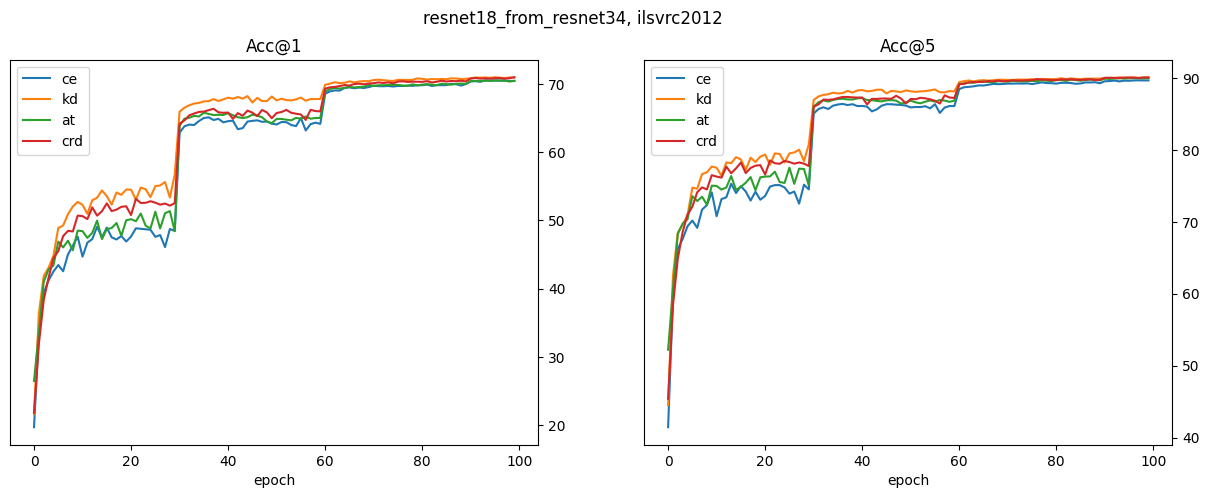

In [11]:
metrics = ['Acc@1', 'Acc@5']
# Set default y-axis tick labels on the right
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = False  # Ensure left ticks are off if desired
plt.rcParams['ytick.labelleft'] = False

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for run, mtd in zip(run_list, mtd_list):
    val_cols = pd.read_csv(run)
    for i, mtc in enumerate(metrics):
        axes[i].plot(val_cols[mtc], label=mtd)
        #axes[i].set_ylabel('accuracy')
        axes[i].set_xlabel('epoch')
        axes[i].set_title(mtc)
        axes[i].legend()

plt.suptitle('{}, {}'.format(arch, dataset))

Text(0.5, 0.98, 'resnet18_from_resnet34, ilsvrc2012')

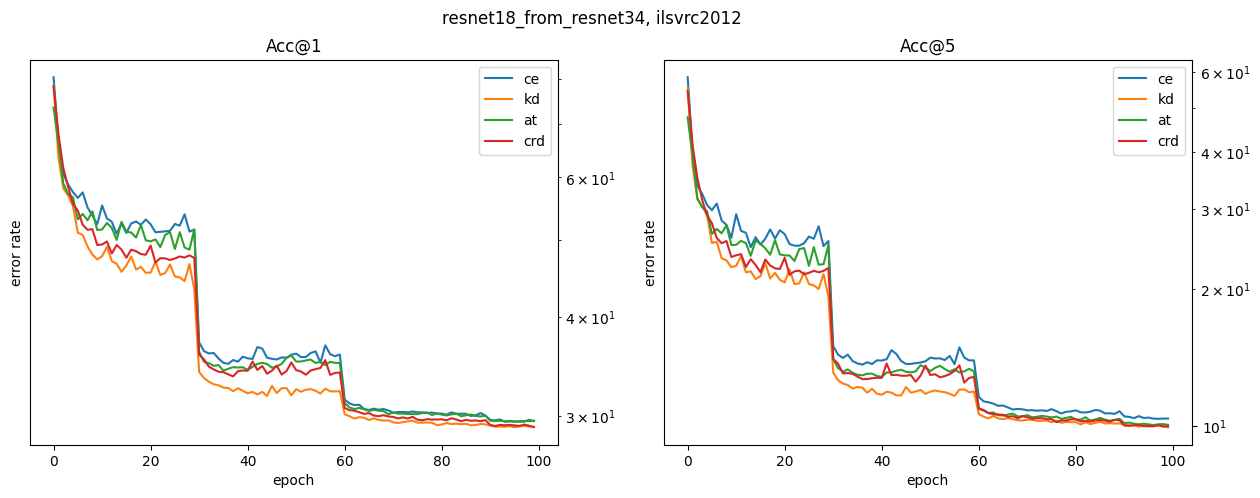

In [12]:
metrics = ['Acc@1', 'Acc@5']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for run, mtd in zip(run_list, mtd_list):
    val_cols = pd.read_csv(run)
    for i, mtc in enumerate(metrics):
        acc = val_cols[mtc]
        err = 100 - acc

        ax = axes[i]
        ax.plot(err, label=mtd)
        axes[i].set_ylabel('error rate')
        ax.set_yscale('log')
        ax.set_xlabel('epoch')
        ax.set_title(mtc)
        ax.legend()

#plt.ticklabel_format(axis='y', style='plain')
plt.suptitle('{}, {}'.format(arch, dataset))

In [13]:
test_list = [
    os.path.join(root_dir, dataset, mtd, tag, arch+test_suffix) for mtd, tag in zip(mtd_list, tag_list)
]
test_list

['log/ilsvrc2012/ce/resnet18_from_resnet34_test.csv',
 'log/ilsvrc2012/kd/run-2025-08-05/resnet18_from_resnet34_test.csv',
 'log/ilsvrc2012/at/resnet18_from_resnet34_test.csv',
 'log/ilsvrc2012/crd/run-2025-08-05/resnet18_from_resnet34_test.csv']

In [14]:
grouped_result = {}

for run, mtd in zip(test_list, mtd_list):
    test_tb = pd.read_csv(run)
    tc = test_tb['type'] == 'Teacher'
    st = test_tb['type'] == 'Student'
    
    tch_tb = test_tb[tc]
    stu_tb = test_tb[st]
    
    grouped_result[mtd] = []
    grouped_result['teacher'] = []
    for mtc in ['Acc@1', 'Acc@5']:
        grouped_result[mtd].append(stu_tb[mtc].values[0])
        if not tch_tb.empty:
            grouped_result['teacher'].append(tch_tb[mtc].values[0])

grouped_result

{'ce': [np.float64(70.506), np.float64(89.506)],
 'teacher': [np.float64(73.448), np.float64(91.518)],
 'kd': [np.float64(70.974), np.float64(90.046)],
 'at': [np.float64(70.506), np.float64(89.968)],
 'crd': [np.float64(70.954), np.float64(90.034)]}

In [15]:
mtc_list = ['Acc@1', 'Acc@5']
tch_vals = {mtc: [] for mtc in mtc_list}
stu_vals = {mtc: [] for mtc in mtc_list}

for run, mtd in zip(test_list, mtd_list):
    test_tb = pd.read_csv(run)

    tc_idx = test_tb['type'] == 'Teacher'
    st_idx = test_tb['type'] == 'Student'
    tch_tb = test_tb[tc_idx]
    stu_tb = test_tb[st_idx]
    
    for ax, mtc in zip(axes, ['Acc@1', 'Acc@5']):
        names = test_tb['type']
        vals = test_tb[mtc]
        if not tch_tb.empty:
            tch_vals[mtc].append(tch_tb[mtc].values[0])
        stu_vals[mtc].append(stu_tb[mtc].values[0])
        #ax.bar(names, vals, label=names, color=bar_colors[:2])

stu_vals, tch_vals

({'Acc@1': [np.float64(70.506),
   np.float64(70.974),
   np.float64(70.506),
   np.float64(70.954)],
  'Acc@5': [np.float64(89.506),
   np.float64(90.046),
   np.float64(89.968),
   np.float64(90.034)]},
 {'Acc@1': [np.float64(73.306), np.float64(73.444), np.float64(73.448)],
  'Acc@5': [np.float64(91.42), np.float64(91.536), np.float64(91.518)]})

Text(0.5, 0.98, 'resnet18_from_resnet34, ilsvrc2012')

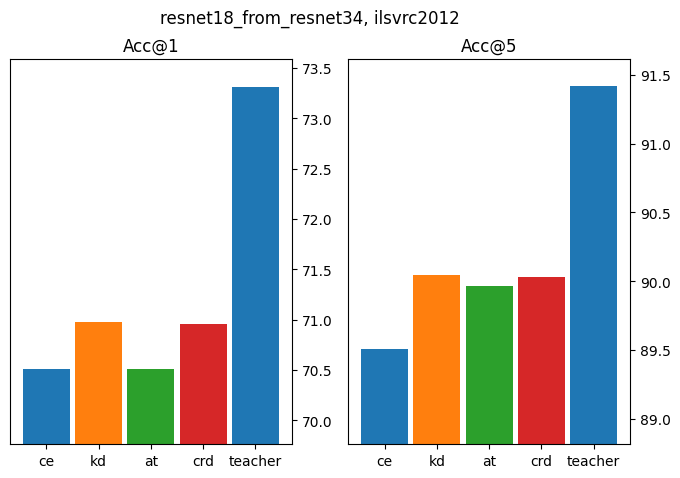

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
width = 0.9

names = mtd_list + ['teacher']
for ax, mtc in zip(axes, mtc_list):
    vals = np.array(stu_vals[mtc] + [tch_vals[mtc][0]])
    ax.bar(names, vals, width, color=bar_colors)
    val_mean, val_min, val_max = vals.mean(), vals.min(), vals.max()
    val_range = (val_max - val_min)
    ax.set_ylim([2*val_min - val_mean, val_max + val_range * 0.1])
    ax.set_title(mtc)

plt.suptitle('{}, {}'.format(arch, dataset))